In [37]:
using POMDPs
using POMDPModels
using TabularTDLearning
using POMDPPolicies
using RLInterface
using IJulia
using POMDPModelTools
IJulia.clear_output(true)

0

In [38]:
m = SimpleGridWorld();

In [39]:
env = MDPEnvironment(m, GWPos);

In [48]:
const Q = zeros(length(states(m)), length(actions(m)));

In [49]:
function run_episode!(Q; α=0.1, ϵ=0.1, show=false, max_t=200)
    A = actions(m)
    done = false
    rsum = 0.0
    s = reset!(env)
    t = 1
    γ = 0.95
    while t <= max_t
        si = stateindex(m, s)
        
        # select action (eps greedy)
        if rand() < ϵ
            a = rand(A)
        else
            a = A[argmax(Q[si, :])]
        end
        ai = actionindex(m, a)
        
        sp, r, done, info = step!(env, a)
       
        rsum += γ^t*r
        
        spi = stateindex(m, sp)
        Q[si,ai] += α * (r + γ * maximum(Q[spi,:]) - Q[si,ai])
        
        if done
            break
        end
        
        if show
            IJulia.clear_output(true)
            display(POMDPModelTools.render(m, (s=s,),
                color=s->maximum(Q[stateindex(m, s),:]),
                policy=ValuePolicy(m, Q)
            ))
        end
        
        s = sp
        t += 1
    end
    return rsum
end

run_episode! (generic function with 1 method)

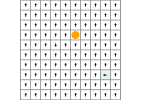

0.0

In [58]:
run_episode!(Q, show=true, ϵ=0.9, max_t=20)

In [66]:
for i in 1:10000
    run_episode!(Q)
end
@show run_episode!(Q)

run_episode!(Q) = 8.145062499999998


8.145062499999998

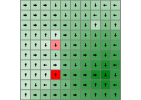

In [67]:
            display(POMDPModelTools.render(m, NamedTuple(),
                color=s->maximum(Q[stateindex(m, s),:]),
                policy=ValuePolicy(m, Q)
            ))